## Método QR
Trabajemos desde cero, viendo el comportamiento del método potencia en el autoespacio generado por el primer autovector, como podemos generalizar esto a autoespacios más grandes, y como QR nos permite encontrar estos autoespacios, y con ellos, los autovalores de una matriz.
En toda la discusión, supondremos lo siguiente: 
- Los autovalores de $A$ son $\lambda_1 , \lambda_2,...,\lambda_n$, ordenados según su módulo de forma decreciente
- Los autovectores $v_1,v_2,...,v_n$ de $A$ forman una base para $\mathbb{R}^n$
- $A$ es invertible

Al usar método potencia, tomamos un vector inicial $x = c_1 v_1 + c_2 v_2 + ... + c_n v_n$. Para que funcione, necesitaremos que $c_1 \neq 0$, y aplicaremos $A$ a $x$, obteniendo $$A^m x= c_1 \lambda_1^m v_1 + ... + c_n \lambda_n^m v_n$$
Si nosotros conocieramos $\lambda_1$ y supieramos que $|\lambda_1| > |\lambda_2|$, tendriamos que 
$$ (1/\lambda_1)^m A^m x = c_1 v_1 + c_2 (\lambda_2 / \lambda_1)^m v_2 + ... + c_n (\lambda_n / \lambda_1)^m v_n $$
Como $|\lambda_k / \lambda_1|^m \rightarrow 0 $ si $m \rightarrow \infty$ par cualquier $k$, mientras más iteremos, obtenemos un vector cuya direccion se acerca cada vez más y más a $v_1$, mientras que las direcciones en los otros vectores $v_2,...,v_n$ se hacen arbitrariamente pequeñas. 

Si en vez de pensar en $A^m x$, llamamos $S = \langle x \rangle$, podemos ver cada paso como la elección de un representante de $A^m S = \langle A^m x \rangle$, y la convergencia se puede apreciar en que el ángulo o distancia entre los espacios vectoriales $A^m S$ y $\langle v_1 \rangle$ tiende a 0 Aunque todavia no tenemos una _definicón_ de estos ángulos o distancias, un ejemplo puede ayudar a verlo:

Si comenzamos con la matriz propuesta $A= \begin{bmatrix} 2 & 1 \\ 3 & 4 \end{bmatrix}$ y el vector inicial $x_0 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$, normalizando en cada paso obtenemos la siguiente gráfica:
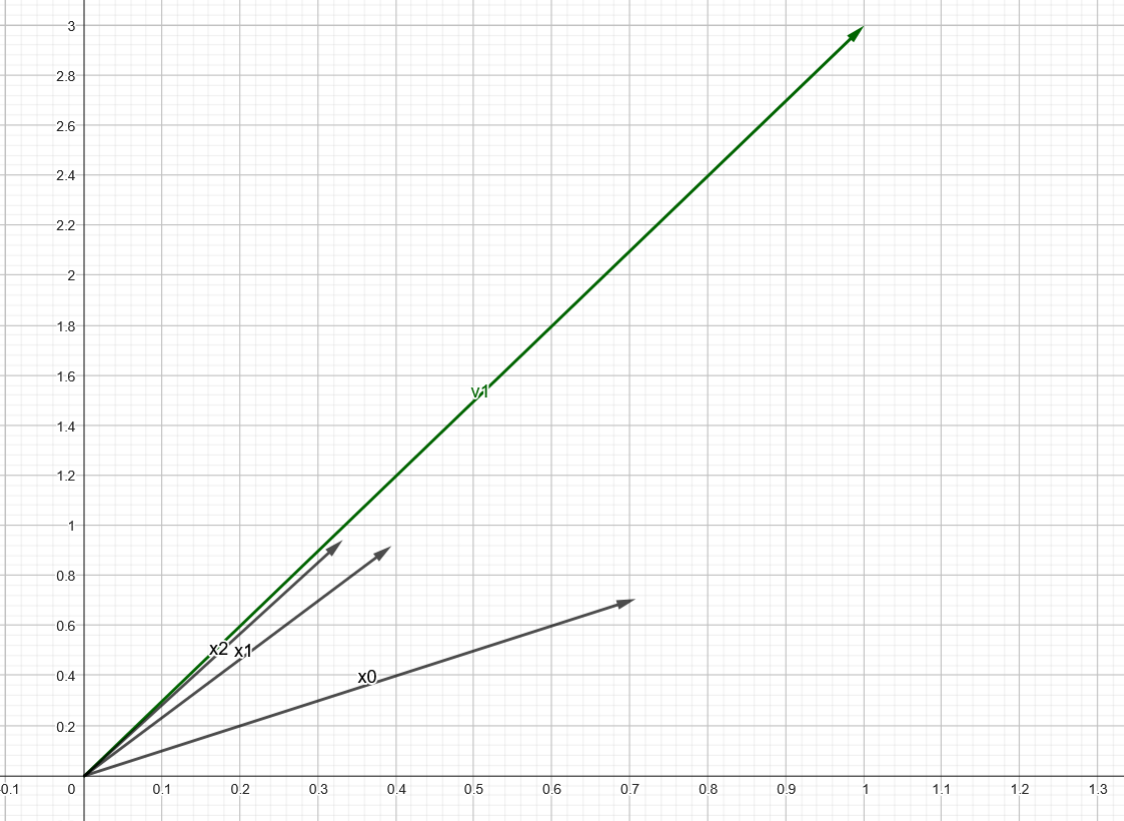
Podemos observar que con tan solo 3 iteraciones, ya nos hemos acercado muchísimo a un vector en $\langle v_1 \rangle $

Ahora, que pasa si queremos encontrar autoespacios más grandes? LLamemos $T_k = \langle v_1, ... ,v_k \rangle$ y $U_k = \langle v_{k+1} , ... ,v_n \rangle$. Comencemos con un espacio $S_k$ que aunque podria ser con la dimensión que quiera, por simplicidad tomemos $S = \langle x \rangle $ con la condición que $S_k \cap U_k = \langle 0 \rangle$, equivalente a decir que las primeras $k$ coordenadas de todo vector de $S_k$ en la base de $v_1,...,v_n$ son distintas a 0, y que $|\lambda_k| > |\lambda_{k+1}|$. Asi, tendriamos que
\begin{align*}
 (1/\lambda_k)^m A^m x = &c_1 (\lambda_1 / \lambda_k)^m v_1 + ... + c_k v_k &&\text{Componente en } T_k \\
 &+ c_{k+1} (\lambda_{k+1}/\lambda_k)^m v_{k+1} + ... + c_n (\lambda_n / \lambda_k)^m v_n &&\text{Componente en } U_k
\end{align*}
Y como $|\lambda_i /\lambda_k | <1 \quad \forall i > k$, tenemos que la componente en $U_k$ se hace cada vez más y más pequeña mientras iteramos $A^mS_k$, por lo que podriamos ver como se acerca a $T_k$.Para dimensiones arbitrarias, hacemos este proceso con cada elemento de la base. De ahora en adelante, tomemos $S_k$ con dimensión $k$

Si definimos la métrica entre subespacios vectoriales de $\mathbb{R}^n$ como $d(S, T) = \sup_{\substack{s \in S \\ ||s|| = 1}}\{ \inf_{t \in T} \|s - t\|_2\}$, se puede mostrar siguiendo la idea de la discusión anterior que bajo las hipótesis de que $S_k \cap U_k = \langle 0 \rangle$, y $|\lambda_k| > |\lambda_{k+1}|$, entonces $d(A^m S_k,T_k) \leq C \cdot (\lambda_{k+1}/\lambda_k)^m \quad(\bigstar)$, con $C$ una constante. Esto será importantisimo más tarde.

A la hora de ir calculando estos $A^m S_k$, como no podemos realmente calculr todo el espacio, trabajmos sobre una base inicial de $S_k$, digamos $\{b_1,...,b_k\}$, y vamos calculando $\{A^m b_1, ... A^m b_r\}$ que son bases de $A^m S_k$. Hay un problema, y es que todos estos elementos de la base van acercandose independientemente a elementos en $T_k$, mientras que su magnitud crece. Esta base no es buena, y la mejor manera que podemos arreglarla es ortonormalizarla. Esto es, aplicamos Gram-Smith a la base mala $\{A^m b_1, ... A^m b_r\} $ para obtener una base buena (ortonormal) $\{q_1^m , ... ,q_k^m\} $

**Primer hecho fundamental** : Si $\{q_1 , ... ,q_k\} $ es la ortogonalizción de la base $ \{ b_1,...,b_k \} $ para $S_k$, entonces $\{q_1, ... , q_i\}$ es un ortogonalización de la base $\{b_1,...,b_i \} $ para $S_i$, para cualquier $i \leq k$. Gracias a esto, si hacemos $S_n = \mathbb{R}^n = \langle e_1, ... , e_n \rangle$, y vamos iterando y encontrando bases buenas para $A^m S_n$, simultáneamente vamos encontrando basaes buenas para $A^m S_k \quad \forall k \leq n$

Bueno, y todo esto para que? Sabemos que con el subespacio inicial adecuado, podemos entonces encontrar grcias a un proceso de plicaación de $A$ y ortogonalización, bases para espacios vectoriales $A^m S_k$ arbitrariamente cercanas a los autoespacios $T_k$ gracias a $(\bigstar)$. Pero aqui viene lo más importante. Si fijo $k$, y $Q = [ Q_1 | Q_2 ]$ es una matriz ortogonal cuyas primeras $k$ columnas $[Q_1]$ generan al autoespacio $T_k$, entonces se tiene lo siguiente:
$$
Q^T A Q =\begin{bmatrix}
    Q_1^T  \\ Q_2^T
\end{bmatrix} A \begin{bmatrix}
    Q_1 Q_2
\end{bmatrix} = \begin{bmatrix}
    Q_1^T A Q^1 & Q_1^TAQ_2 \\ Q_2^TAQ_1 & Q_2^T A Q_2
\end{bmatrix} = \begin{bmatrix}
    A_{11} & A_{12}  \\ 0 & A_{22}
\end{bmatrix}
$$
Donde $A_{11} \in \mathbb{R}^{k \times k} $, y $Q_2^T A Q_1 = Q_2^T Q_1 = 0$, por ser el espacio columna de $Q_1$ invariante bajo $A$, y ser $Q$ ortogonal.

**Segundo hecho fundamental** : Si le pidieramos a $Q$ la condición de que sus para todo $k$, sus primeras $k$ columnas fueran una base de $T_k$, entonces tendríamos que $Q^T A Q$ es triangular superior, y como es similar a $A$, encontraríamos a los autovalores de $A$ en la diagonal de $Q^T A Q$  

Con esto, ya tenemos una meta: tratar de encontrar esta $Q$ mágica que nos muestra los autovalores de $A$ de una manera tan linda, y para eso, utilizaremos el primer hecho fundamental. En la práctica **no** se conoce a  $Q$, pero se puede ir aproximando con la matirz $Q_m$ cuyas columnaas son los elementos de la baase buena $\{q_1^m,...,q_n^m \} $, que tiene la propiedad de que el espacio generado por sus primeras $k$ columnas es _casi_ $T_k$, para cualquier $k$. Se puede ver que mientras estos espacios se acercan, los elementos debajo de la diagonal superior de $Q_m^T A Q_m$ se van haciendo pequeños, con la misma velocidad que $A^m S_k$ se acerca a $T_k$, osea $(\lambda_{k+1}/\lambda_k)^m$ 


Con todo esto listo, podemos porfin comenzar a idear un algoritmo:
1. Hacemos $S = \langle e_1,...,e_n \rangle = \langle q_1^0,...,q_n^0 \rangle$, que ya es una base ortogonal
2. Calculamos $D_0= AS = A = [ Ae_1,...,Ae_n ]$. Sabemos que esta no es una base muy buena, por lo que calculamos más bien otra base $\{q_1^1,...,q_n^1 \}$ ortogonal. Esta corresponde a las columnas de la matriz $Q_1$ de la descomposición $A = Q_1 R_1$
3. Miramos si las entradas bajo la diagonal de $Q_1^T A Q_1$ ya son suficientemente pequeñas como para considerarla triangular superior. Si eso sucede, retornamos las entradas de la diagonal de esa matriz. Si no, procedemos a
4. Repetimos 2. y 3 : Hacemos $D_{i+1} = A D_i = [ A q_1^i,..., A q_n^i ]$, pero cambiamos esta base mala por la base $\{q_1^{i+1},...,q_n^{i+1} \}$, obtenida como los vectores columnas de $Q_{i+q}$ de la factorización $D_{i+1} = Q_{i+1} R_{i+1} $, y si $Q_{i+1} ^T A Q_{i+1}$ es suficientemente triangular superior, devolvemos los elementos de la diagonal

Es valioso comparar esto con el planteamiento clásico del algoritmo QR. 

Al principio, hagamos $A_0 = A$, y $A_1 = Q_1^T A Q_1$. Pero habiamos hecho $A = Q_1 R_1 \iff Q_1^T A = R_1$, por lo que realmente $A_1 = R_1 Q_1$. Después, para $D_2 = A Q_1$, hacemos factorización QR y encontramos que $ A Q_1 = Q_2 R_2 \iff Q_2^T A = R_2 Q_1^T$. Hacemos $A_2 = Q_2^T A Q_2$, y $A_1 = Q_2'R_2' \iff Q_2' ^T A_1 = R_2 '$. Como $D_1 = A Q_1 = Q_1 A_1 = Q_1 Q_2' R_2'$, por unicidad de la descomposición QR (estamos suponiendo que A no es singular), tenemos que $R_2' = R_2$ y que $Q_2 = Q_1 Q_2'$. Por tanto, $A_2 = Q_2^T A Q_2 = Q_2'^T Q_1 ^T  Q_1 Q_2' = Q_2'^T A_1 Q_2' = R_2' Q_2'$, y obtenemos la fórmula estándar de la iteración QR: $A_0 = A, A_k = Q_k' R_k', A_{k+1} = R_k' Q_k'$, equivalente a todo el trabjo que hemos hecho, lo que indica por que estas $A_i$ se acercan a una matriz triangular superior.

Bien, que limitantes hemos impuesto sobre $A$ y $S$ para llegar a todo esto? Primero, como queremos que $S_k \cap U_k = \langle 0 \rangle \quad \forall k$, esto equivale a pedir que $\langle e_1,...,e_k\rangle \cap \langle v_{k+1},...,v_{n}\rangle = \langle 0 \rangle \quad \forall k$, y por rgumentos de dimensionalidad de los $U_k$ y $S_k$, esto se cumple para prácticamente cualquier matriz A, son muy pocos los casos patológicos, asi que podemos tomar por sentada esta condición. Le pedimos a A que fuera simple, pero se puede mostrar que esta condición no es del todo necesaria, aunque se debe reemplazar a la $C$ en $(\bigstar)$ por un polinomio $C(m)$, y si hay valores propios con módulo repetido, tambien se puede mostrar que converge, pero en ambos de estos casos, la convergencia es muy lenta, por lo que realmente no vale la pena utilizarlo en esta clase de matrices.


Ahora, en el mundo numérico tenemos un problema: el método de ortogonalización de Gram-Schmidt clásico es bastante inestable numéricamente. En cada paso se deben calcular muchos productos y por lo menos una división, lo que tiende a amplificar los errores producidos por trabajar con aritmética de precisión finita a lo largo del proceso. Proponemos más bien una implementación de Gram-Schmidt modificada para hacer la descomposición QR. Comenzamos con una base $\{a_1,...,a_n\}$, e inicializamos otra $\{v_1,...,v_n\}$. Después, normalizamos $v_1$ para obtener el primer vector ortonormal $q_1 = v_1 / || v_1||$, y después, restamos de todos los $v_i$ para $i>1$ las proyecciones $\mathcal{P}_{q_1}(v_i) = \langle q_1,x_i \rangle q_1$. Normalizamos $v_2$ para obtener $q_2 = v_2 /||v_2||$, y restamos de $v_i$ para $i>2$,  $\mathcal{P}_{q_2}(v_i) = \langle q_2,v_i \rangle q_2$. Seguimos así hasta normalizar todos los $v_i$. Ya que tenemos los $q_i$, estos corresponden a las columnas de $Q$.
Para ilustrar, si hacemos el proceso en una base $\{ a_1,a_2,a_3 \}$, obtenemos lo siguiente:
\begin{align*}
\begin{cases}
v_1 = a_1\\
v_2 = a_2 \\
v_3 = a_3\\
\end{cases}& \mapsto \begin{cases}
q_1 = v_1/||v_1||\\
v_2 = a_2 - \langle q_1,a_2 \rangle q_1\\
v_3 = a_3 - \langle q_1,a_3 \rangle q_1
\end{cases}\\ & \mapsto \begin{cases}
q_1 = v_1/||v_1||\\
q_2 = v_2/||v_2||\\
v_3 = a_3 - \langle q_1,a_3 \rangle q_1 - \langle q_2, (a_3 - \langle q_1,a_3 \rangle q_1) \rangle q_2 
\end{cases}\iff \begin{cases}
q_1 = v_1/||v_1||\\
q_2 = v_2/||v_2||\\
v_3 = a_3 - \langle q_1,a_3 \rangle q_1 - \langle q_2,a_3\rangle q_2 - \langle q_2 ,\langle q_1,a_3 \rangle q_1\rangle q_2
\end{cases}\iff \begin{cases}
q_1 = v_1/||v_1||\\
q_2 = v_2/||v_2||\\
v_3 = a_3 - \langle q_1,a_3 \rangle q_1 - \langle q_2,a_3\rangle q_2
\end{cases}\\ &\mapsto \begin{cases}q_1 = v_1/||v_1||\\
q_2 = v_2/||v_2||\\
q_3 = v_3/||v_3|| \end{cases}
\end{align*}
Podemos ver que es equivalente al proceso estándar de Gram-Schmidt, pero por que es más estable?


In [1]:
import numpy as np
def QR_factor(A): #Gram-Schmidt modificado
    """
    Entrada: A matriz de numpy invertible n x n
    Proceso de ortogonalización de Gram-Smith modificado en los vectores columna de A
    Salida: Q y R con Q ortogonal y R triangular superior con diagonal positiva tales que A = Q R
    """
    n = A.shape[0]
    v = np.zeros((n,n)) 
    Q = np.zeros((n,n))
    R = np.zeros((n,n))
   
    for i in range(n):
        v[:,i] = A[:,i] #Inicializamos A
    #print(v)
    for i in range(n):
        R[i,i] = np.linalg.norm( v[:,i]) #Como esto es el coeficiente de q_i en la i-ésima fila, es la i,i-ésima componente de R
        Q[:,i] = (1/R[i,i]) * v[:,i] #Normalizamos v_i
        for k in range(i+1,n):
            R[i,k] = Q[:,i] @ v[:,k] #Esto será el coeficiente de q_i en la k-ésima fila, por tanto es la i,k-ésima componente de R
            v[:,k] = v[:,k] - R[i,k] * Q[:,i] #Actualizamos v_k restándole la proyección <q_i,v_k>q_i
    return Q,R

In [2]:
def bottom_half(A):
    """
    Almacena las componentes debajo de la diagonal superior de A
    """
    n = A.shape[0]
    L=[]
    for i in range(n):
        T = list(A[i,:])
        for k in range(i):   
            L.append(T[k])
    return L

def QR_algor(A,max_iteraciones=10000,tol=10e-8):
    """
    Entrada: A matriz de numpy que debería ser simple e invertible, con autovalores distintos en módulo
             max_iteraciones: tope de recursion. si se alcanza se retorna error
             tol: tolerancia, que tan cerca de ser triangular superior es la matriz A^(n) en el paso n
    Salida: B matriz (casi) triangular superior similar a A, con sus autovalores ordenados por su módulo en la diagonal, lista con los autovalores, iteraciones necesarias
    """
    iteracion = 0
    n=A.shape[0]
    while iteracion < max_iteraciones:
        iteracion += 1
        Q,R = QR_factor(A) #Calculamos la descomposición A_k = Q'_k R'_k
        A = R @ Q  #Y hacemos A_(k+1) = R'_k Q'_k. Sabemos que sto es equivalente a Q_k^T A Q_k obtenidas por iteración simultánea, y converge a una matriz triangular superior
        L = [abs(l) for l in bottom_half(A)] #Para chequear si estamos suficientemente cerca, tomamos los valores absolutos de la mitad triangular inferior de A...
        if max(L) < tol: #Y aceptamos si todos son menores que la tolerancia
            Autovalores = [A[i][i] for i in range(n)] #Almacenamos los autovalores aqui
            return A,Autovalores,iteracion
    print(A)
    print(Q)
    print(Q.transpose() @ Q)
    print ("Iteraciones máximas alcanzadas")
    print ("Matriz actual:")
    return A,[],iteracion #Error si no converge suficientemente rápido. Igual es de interés ver a que resultado se llegó

Bien, solo nos falta describir como se comportan los errores y la convergencia. Los errores se producen únicamente por artmética de precisión finita, en especial en la descomposición QR de cada $A_i$. Existen métodos alternativos más estables par encontrarla, como utilizando reflexiones de Householder o rotaciones de Givens, pero es valioso apreciar la relación entre esta matriz ortogonal $Q$ y el proceso de ortogonalización de las columnas de $A_i$, además de ser bastante sencillo de implementar. 

Ahora, que tan rápido converge esto a una matriz triangular superior? Sabemos que por $(\bigstar)$, esta debe estar acotada por $C \cdot |\lambda_{i+1} / \lambda_i|^m $ para el $i \in \{ 1, 2,...,n-1\}$que haga más cercana a 1 esta razón. Por tanto, si los autovalores de $A$ no están bien espaciados, la convergencia se puede volver demasiado lenta para ser útil

Hagamos un ejemplo guiado sobre la matriz $A = \begin{bmatrix} 2 & 1 \\ 3 & 4\end{bmatrix}$, haciendo los primeros 3 pasos:

Primero imprimimos $A_0 = A$, después $Q_0$ y $R_0$, y después $A_1 = R_0 \,Q_0$, y seguimos. Obtenemos lo siguiente:

In [3]:
A = np.array([[2, 1], 
             [3, 4]])

print(A)
A1 = A
for i in range(3):
    Q,R = QR_factor(A1)
    print(Q)
    print(R)
    A1=R@Q
    print(A1)

[[2 1]
 [3 4]]
[[ 0.5547002  -0.83205029]
 [ 0.83205029  0.5547002 ]]
[[3.60555128 3.88290137]
 [0.         1.38675049]]
[[ 5.23076923 -0.84615385]
 [ 1.15384615  0.76923077]]
[[ 0.97652377 -0.21540966]
 [ 0.21540966  0.97652377]]
[[ 5.35652011 -0.66058961]
 [ 0.          0.93344184]]
[[ 5.08847185 -1.79892761]
 [ 0.20107239  0.91152815]]
[[ 0.99922018 -0.03948446]
 [ 0.03948446  0.99922018]]
[[ 5.09244302 -1.76153358]
 [ 0.          0.98184702]]
[[ 5.01891864 -1.9612323 ]
 [ 0.0387677   0.98108136]]


Escribamos lo que son estas matrices
### Paso 1:
$A_0 = A = \begin{bmatrix}
2 & 1 \\
3 & 4
\end{bmatrix} = Q_1\, R_1 = \begin{bmatrix}
0.5547002 & -0.83205029 \\
0.83205029 & 0.5547002
\end{bmatrix} \begin{bmatrix}
3.60555128 & 3.88290137 \\
0 & 1.38675049
\end{bmatrix}$
### Paso 2:
$A_1 = R_0 \, Q_0 = \begin{bmatrix}
5.23076923 & -0.84615385 \\
1.15384615 & 0.76923077
\end{bmatrix} = Q_2 \, R_2 = \begin{bmatrix}
0.97652377 & -0.21540966 \\
0.21540966 & 0.97652377
\end{bmatrix}\begin{bmatrix}
5.35652011 & -0.66058961 \\
0 & 0.93344184
\end{bmatrix}$
### Paso 3:
$A_2 = R_1 \, Q_1 = \begin{bmatrix}
5.08847185 & -1.79892761 \\
0.20107239 & 0.91152815
\end{bmatrix} = Q_2 \, R_2 =\begin{bmatrix}
0.99922018 & -0.03948446 \\
0.03948446 & 0.99922018
\end{bmatrix} \begin{bmatrix}
5.09244302 & -1.76153358 \\
0 & 0.98184702
\end{bmatrix}$
### Paso final:
Después de todo esto, obtenemos la matriz $A_3 = \begin{bmatrix}
5.01891864 & -1.9612323 \\
0.0387677 & 0.98108136
\end{bmatrix} $
En cada uno de los pasos, podemos apreciar como disminuye la componente inferior izquierda de la matriz, el el paso 1 disminuye un 38.4%, después un 17.4%, y por último un 19.3% aproximadamente. Si corremos el código para hallar los valores propios, obtenemos lo siguiente:

In [4]:
AA,Autovalores,i = QR_algor(A,tol=1e-5)
with np.printoptions(precision=6, suppress=True, formatter={'float': '{:0.6f}'.format}, linewidth=100):
    print("Matriz (casi) diagonal similar a A:")
    print(AA)
    print(f"Autovalores de A:{Autovalores}, en {i} pasos")

Matriz (casi) diagonal similar a A:
[[5.000001 -1.999998]
 [0.000002 0.999999]]
Autovalores de A:[5.000001228798867, 0.9999987712011326], en 9 pasos


Por tanto, $A$ comparte autovalores con $\begin{bmatrix}
5.000001 & -1.999998 \\
0.000002 & 0.999999
\end{bmatrix}$, y llegamos a esta precisión de los primeros 5 digitos decimales con 9 iteraciones

Mostremos ahora algo que es motivo de preocupación: Corramos ahora QR en $F= \begin{bmatrix}
2 & 1 & 2 \\
1 & 1 & 3 \\
1 & 1 & 1
\end{bmatrix}$ para buscar precisión de 5 cifras decimales:

In [5]:
F = np.array([[2, 1, 2],
             [1, 1, 3],
             [1, 1, 1]])
AA,Autovalores,i = QR_algor(F,tol=1e-5)
with np.printoptions(precision=6, suppress=True, formatter={'float': '{:0.6f}'.format}, linewidth=100):
    print(f"Matriz (casi) diagonal similar a F:")
    print(AA)
    print(f"Autovalores de F:{Autovalores}, en {i} pasos")

Matriz (casi) diagonal similar a F:
[[4.124885 1.839028 1.035010]
 [-0.000000 -0.761562 -0.739402]
 [0.000000 0.000009 0.636677]]
Autovalores de F:[4.124885419764574, -0.7615619253279566, 0.6366765055633824], en 73 pasos


Que podemos observar? Para F, se toma una  cantidad de iteraciones mucho mayor de la esperada para una matriz 3 x 3 aparentemente tan sencilla. Por que es esto? Sabíamos que la convergencia dependia de la razón más grande entre los módulos de los autovalores. Aqui encontramos autovalores $\lambda_2 \approx -0.7616$ y $\lambda_3 \approx 0.6367$, por lo que $|\lambda_3 / \lambda_2 | \approx 0.6367/0.7616 \approx 0.836$, que no es muy lejano a 1. Por tanto, la mitad triangular inferior de la iteración $A_k$ converge a cero relativamente despacio, y aqui se muestra una de las debilidades más grande de esta versión básica del algoritmo QR. Si existen autovalores muy cercanos en módulo, la convergencia puede volverse demasiado lenta. En la práctica, esto se arregla con una idea llamada shifting, encontrando un valor $\sigma$ adecuado que sea cercano a $\lambda_k$ pero no a $\lambda_{k+1}$. Con esto, si hacemos $A = A - \sigma I$, esto desplaza los valores propios de A una longitud de $\sigma$, y la razón cercana a 1 $|\lambda_{k+1}/\lambda_{k}|$ se convierte en $| (\lambda_{k+1} - \sigma)/(\lambda{k} - \sigma) $ que es mucho menor pues $\lambda_k - \sigma \approx \lambda_{k}$ pero $\lambda_{k+1} - \sigma << \lambda_{k+1}$. Este proceso involucra criterios para escoger buenos $\sigma$ para cada autovalor, e ir descartando los que se vayan encontrando. Se puede mostrar que con esa implementación, se puede acelerar la convergencia de QR a algo superlineal



En conclusión, que tiene de bueno y de malo el método QR? Listemos todo esto
#### **Requerimientos**
- Toda la discusión se ha basado en que la matriz no tenga autovalores que compartan módulo, que sus autovectores formen una base para $\mathbb{R}^n$, y que $ \langle e_1, ... , e_k \rangle \cup \langle v_{k+1},...,v_n \rangle = \langle 0 \rangle $. Aunque esta última condición se cumple paraa casi todas las matrices, las primeras dos no son triviales y le piden a la matriz un nivel básico de buen comportamientos. Aunque no son del todo necesarias para asegurar convergencia, la obtienen a un ritmo lo suficientemente lento como para que no valga la pena concentrrnos en matrices que no cumplan esos requisitos

#### **Pros:**
- Permite encontrar simultáneamente todos los autovalores (reales) de la matriz. Más aún, si en vez de trabajar con matrices ortogonales, lo hacemos con matrices unitarias, y reemplazmos el operador transpuesta por el operador adjunta, absolutamente todo lo que hicimos aqui se puede generalizr a matrices con entradas complejas, y en particular, para el caso de una matriz con entradas reales pero con autovalores complejos. Con la implementación de aqui, si ese fuera el caso, no se obtiene una matriz triangular, sino que se obtienen bloques 2 x 2 repartidos en la diagonal cuyos autovalores sean un par de autovalores conjugados de la matriz original

#### **Contras**
- Si los módulos de los autovalores son cercanos la convergencia es lenta, pues la acota la secuencia de las potencias de la razón entre autovalores consecutivos más grande, y si esa razón es cercana a 1, la rapidez con la que decrece es insuficiente. Se puede arreglar utilizando shifts, pero no se hace en esta implementación
- Al usar ortogonalización basada en el método de Gram-Schmidt modificado, aunque se merma la inestabilidad numérica del método original, no se elimina del todo. Lo mejor es utilizar reflexiones de Householder o rotaciones de Givens, que no son triviales de implementar eficientemente para matrices densas 